In [1]:
import pandas as pd

marketing_campaign_data = 'marketing_campaign.csv'

marketing_campaign_dataframe = pd.read_csv(marketing_campaign_data,
                                           sep='\t',
                                           low_memory=False)

In [2]:
marketing_campaign_dataframe = marketing_campaign_dataframe.reset_index()

In [3]:
marketing_campaign_dataframe.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
marketing_campaign_dataframe = marketing_campaign_dataframe.drop(labels=2234, axis=0)

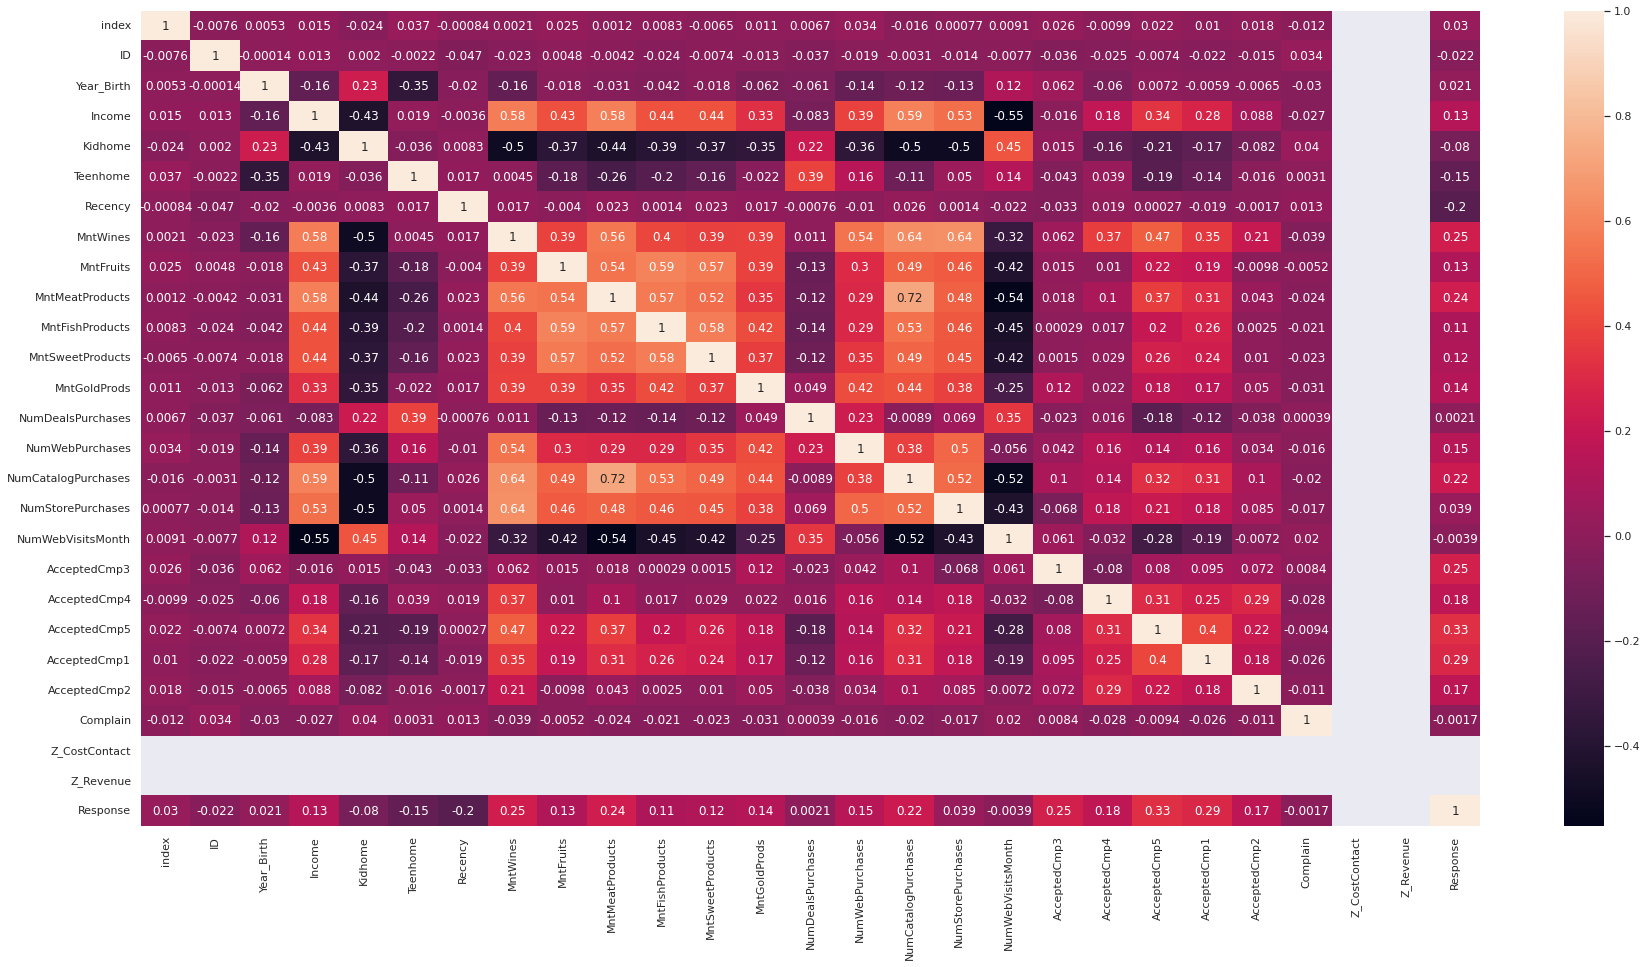

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(30, 15))
sns.heatmap(marketing_campaign_dataframe.corr(), annot=True)

plt.show()

In [9]:
from sklearn.cluster import KMeans

X = marketing_campaign_dataframe[['Education', 'Marital_Status', 'Income',
                                  'Kidhome', 'Teenhome', 'Recency', 'Complain', 
                                  'MntWines', 'MntFruits', 'MntMeatProducts',
                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                  'NumStorePurchases', 'NumWebVisitsMonth']].copy()

X.columns = ['Escolaridade', 'Estado Civil', 'Renda anual do cliente', 'Qnt. Crianças em casa', 
             'Qnt. Adolescentes em casa', 'Recência', 'Reclamações do cliente', 'Qnt. gasta em vinho',
             'Qnt. gasta em frutas', 'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce', 
             'Qnt. gasta produtos em ouro', 'Qnt. compras realizadas com desconto',
             'Qnt. compras realizadas pelo site', 'Qnt. compras realizadas pelo catálogo',
             'Qnt. compras feitas na loja fisica', 'Qnt. visitas ao site mensalmente']

X.head()

,Escolaridade,Estado Civil,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta produtos em ouro,Qnt. compras realizadas com desconto,Qnt. compras realizadas pelo site,Qnt. compras realizadas pelo catálogo,Qnt. compras feitas na loja fisica,Qnt. visitas ao site mensalmente
0,Graduation,Single,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7
1,Graduation,Single,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5
2,Graduation,Together,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4
3,Graduation,Together,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6
4,PhD,Married,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5


In [10]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=['Escolaridade', 'Estado Civil'])
X.columns = ['Renda anual do cliente', 'Qnt. Crianças em casa', 'Qnt. Adolescentes em casa',
             'Recência', 'Reclamações do cliente', 'Qnt. gasta em vinho', 'Qnt. gasta em frutas', 
             'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce', 
             'Qnt. gasta produtos em ouro', 'Qnt. compras realizadas com desconto',
             'Qnt. compras realizadas pelo site', 'Qnt. compras realizadas pelo catálogo',
             'Qnt. compras feitas na loja fisica', 'Qnt. visitas ao site mensalmente', 
             'Doutor', 'Ensino médio', 'Ensino superior', 'Mestre', 'PhD', 
             'Estado Civil Absurdo', 'Estado Civil Sozinho', 'Estado Civil Divorciado',
             'Estado Civil Casado', 'Estado Civil Solteiro', 'Estado Civil Juntos',
             'Estado Civil Viúvo', 'Estado Civil Desapegado']

X.head()

,Renda anual do cliente,Qnt. Crianças em casa,Qnt. Adolescentes em casa,Recência,Reclamações do cliente,Qnt. gasta em vinho,Qnt. gasta em frutas,Qnt. gasta em carne,Qnt. gasta em peixe,Qnt. gasta em doce,Qnt. gasta produtos em ouro,Qnt. compras realizadas com desconto,Qnt. compras realizadas pelo site,Qnt. compras realizadas pelo catálogo,Qnt. compras feitas na loja fisica,Qnt. visitas ao site mensalmente,Doutor,Ensino médio,Ensino superior,Mestre,PhD,Estado Civil Absurdo,Estado Civil Sozinho,Estado Civil Divorciado,Estado Civil Casado,Estado Civil Solteiro,Estado Civil Juntos,Estado Civil Viúvo,Estado Civil Desapegado
0,58138.0,0,0,58,0,635,88,546,172,88,88,3,8,10,4,7,0,0,1,0,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,0,11,1,6,2,1,6,2,1,1,2,5,0,0,1,0,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,0,426,49,127,111,21,42,1,8,2,10,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,0,11,4,20,10,3,5,2,2,0,4,6,0,0,1,0,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,1,0,0,0,1,0,0,0,0


In [11]:
for content in X:
    X.dropna(subset=[content], inplace=True)

In [12]:
wcss = []

for number_of_clusters in range(1, 101):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

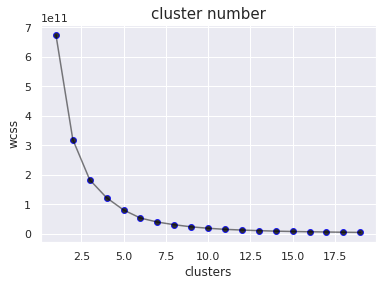

In [171]:
plt.plot(range(1, 20), wcss[1:20], alpha=0.5, color='black')
plt.scatter(range(1, 20), wcss[1:20], alpha=0.8, color='black', edgecolors='blue')
plt.title('cluster number', fontsize=15)
plt.xlabel('clusters', fontsize=12)
plt.ylabel('wcss', fontsize=12)
plt.show()

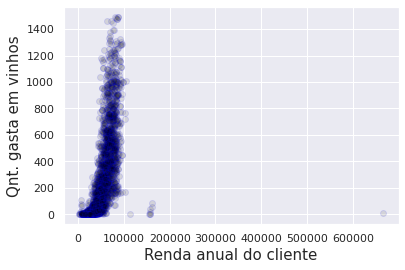

In [78]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em vinho'], alpha=0.1, 
            color='black', edgecolors='blue')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em vinhos', fontsize=15)
plt.show()

In [159]:
import warnings

warnings.filterwarnings('ignore')

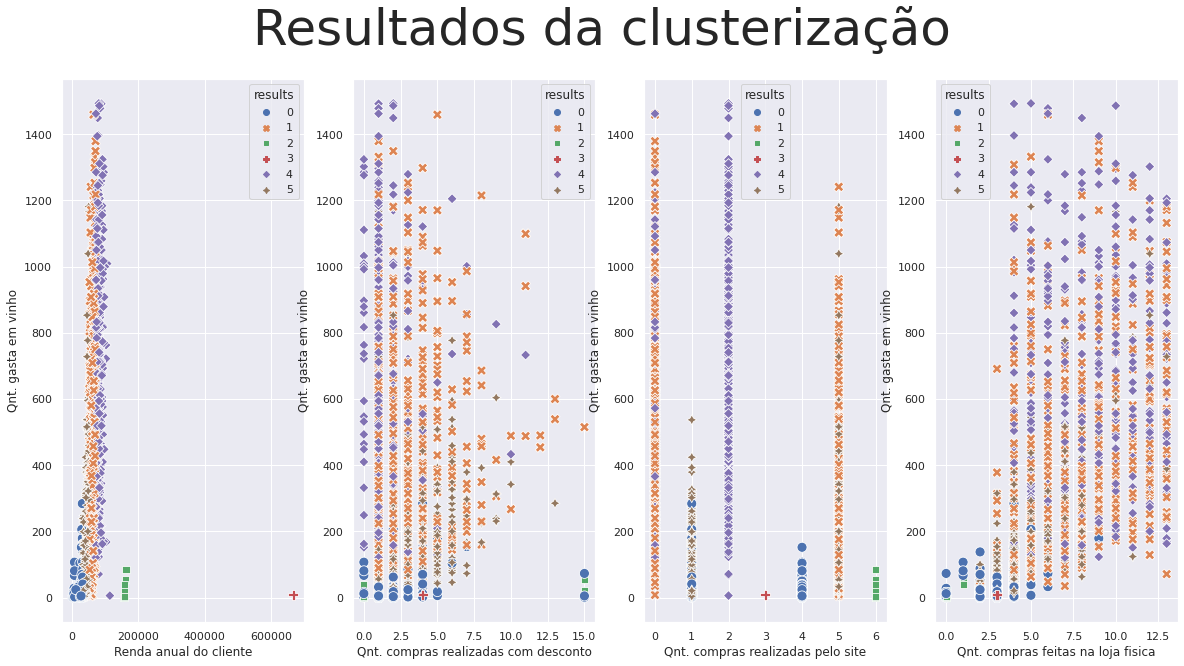

In [160]:
param_analysis = ['Renda anual do cliente', 'Qnt. gasta em vinho', 'Qnt. gasta em frutas',
                  'Qnt. gasta em carne', 'Qnt. gasta em peixe', 'Qnt. gasta em doce',
                  'Qnt. gasta em doce', 'Qnt. gasta produtos em ouro', 
                  'Qnt. compras realizadas com desconto', 'Qnt. compras realizadas pelo site',
                  'Qnt. compras feitas na loja fisica']

data = X.copy()
data = data[param_analysis]

kmeans = KMeans(n_clusters=6)

data['results'] = kmeans.fit_predict(data)

from numpy import unique

clusters = unique(data['results'])

fig, axes = plt.subplots(1, 4, sharex=False, figsize=(20, 10))
fig.suptitle('Resultados da clusterização', fontsize=50)

sns.scatterplot(data['Renda anual do cliente'], data['Qnt. gasta em vinho'],
                ax=axes[0], hue=data['results'], style=data['results'],
                palette='deep', s=100)

sns.scatterplot(data['Qnt. compras realizadas com desconto'], data['Qnt. gasta em vinho'],
                ax=axes[1], hue=data['results'], style=data['results'],
                palette='deep', s=100)

sns.scatterplot(data['Qnt. compras realizadas pelo site'], data['Qnt. gasta em vinho'],
                ax=axes[2], hue=data['results'], style=data['results'],
                palette='deep', s=100)

sns.scatterplot(data['Qnt. compras feitas na loja fisica'], data['Qnt. gasta em vinho'],
                ax=axes[3], hue=data['results'], style=data['results'],
                palette='deep', s=100)

plt.show()

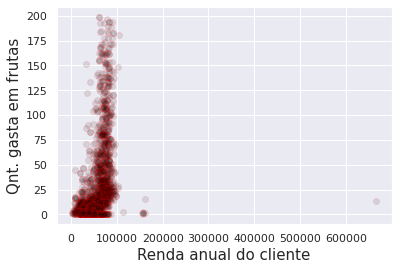

In [15]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em frutas'], alpha=0.1, 
            color='black', edgecolors='red')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em frutas', fontsize=15)
plt.show()

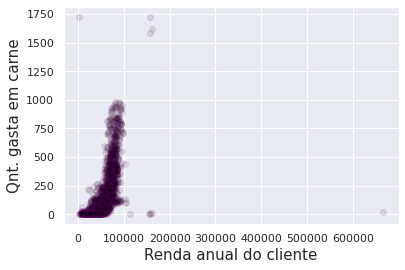

In [16]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em carne'], alpha=0.1, 
            color='black', edgecolors='purple')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em carne', fontsize=15)
plt.show()

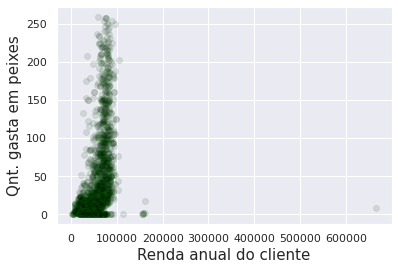

In [17]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em peixe'], alpha=0.1, 
            color='black', edgecolors='green')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em peixes', fontsize=15)
plt.show()

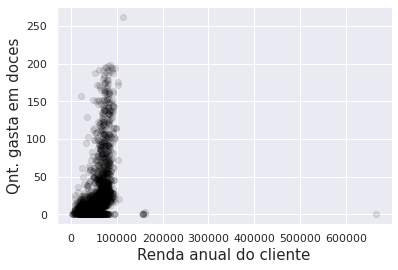

In [18]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta em doce'], alpha=0.1, 
            color='black', edgecolors='black')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em doces', fontsize=15)
plt.show()

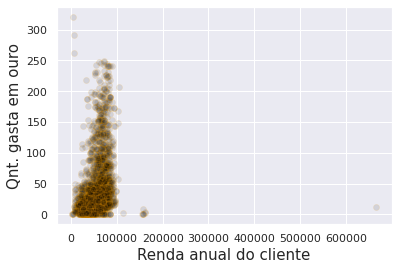

In [120]:
plt.scatter(X['Renda anual do cliente'], X['Qnt. gasta produtos em ouro'], alpha=0.1, 
            color='black', edgecolors='orange')

plt.xlabel('Renda anual do cliente', fontsize=15)
plt.ylabel('Qnt. gasta em ouro', fontsize=15)
plt.show()

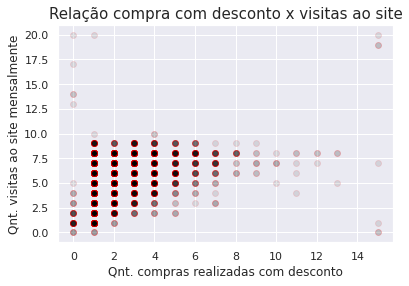

In [41]:
plt.scatter(X['Qnt. compras realizadas com desconto'], X['Qnt. visitas ao site mensalmente'],
            alpha=0.1, color='black', edgecolors='red')

plt.title('Relação compra com desconto x visitas ao site', fontsize=15)
plt.xlabel('Qnt. compras realizadas com desconto', fontsize=12)
plt.ylabel('Qnt. visitas ao site mensalmente', fontsize=12)
plt.show()

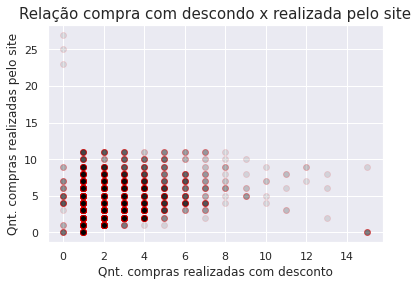

In [40]:
plt.scatter(X['Qnt. compras realizadas com desconto'], X['Qnt. compras realizadas pelo site'],
            alpha=0.1, color='black', edgecolors='red')

plt.title('Relação compra com descondo x realizada pelo site', fontsize=15)
plt.xlabel('Qnt. compras realizadas com desconto', fontsize=12)
plt.ylabel('Qnt. compras realizadas pelo site', fontsize=12)
plt.show()

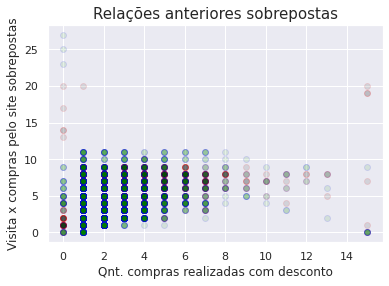

In [39]:
plt.scatter(X['Qnt. compras realizadas com desconto'], X['Qnt. visitas ao site mensalmente'],
            alpha=0.1, color='black', edgecolors='red')

plt.scatter(X['Qnt. compras realizadas com desconto'], X['Qnt. compras realizadas pelo site'],
            alpha=0.1, color='green', edgecolors='blue')

plt.title('Relações anteriores sobrepostas', fontsize=15)
plt.xlabel('Qnt. compras realizadas com desconto', fontsize=12)
plt.ylabel('Visita x compras pelo site sobrepostas', fontsize=12)
plt.show()

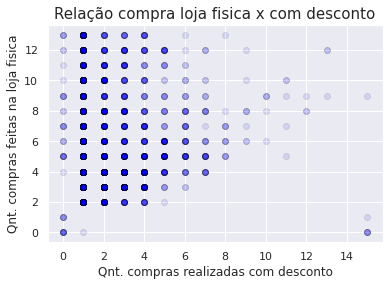

In [45]:
plt.scatter(X['Qnt. compras realizadas com desconto'], X['Qnt. compras feitas na loja fisica'],
            alpha=0.1, color='blue', edgecolors='black')

plt.title('Relação compra loja fisica x com desconto', fontsize=15)
plt.xlabel('Qnt. compras realizadas com desconto', fontsize=12)
plt.ylabel('Qnt. compras feitas na loja fisica', fontsize=12)
plt.show()

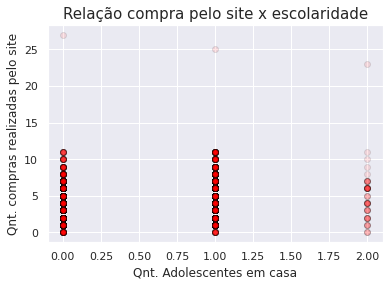

In [54]:
plt.scatter(X['Qnt. Adolescentes em casa'], X['Qnt. compras realizadas pelo site'], alpha=0.1,
            color='red', edgecolors='black')

plt.title('Relação compra pelo site x escolaridade', fontsize=15)
plt.xlabel('Qnt. Adolescentes em casa', fontsize=12)
plt.ylabel('Qnt. compras realizadas pelo site', fontsize=12)
plt.show()

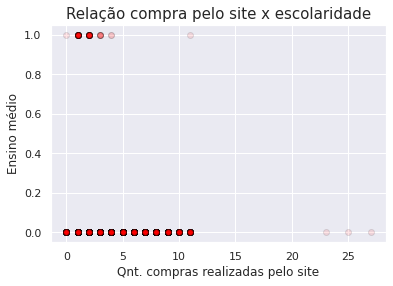

In [49]:
plt.scatter(X['Qnt. compras realizadas pelo site'], X['Ensino médio'], alpha=0.1,
            color='red', edgecolors='black')

plt.title('Relação compra pelo site x escolaridade', fontsize=15)
plt.xlabel('Qnt. compras realizadas pelo site', fontsize=12)
plt.ylabel('Ensino médio', fontsize=12)
plt.show()

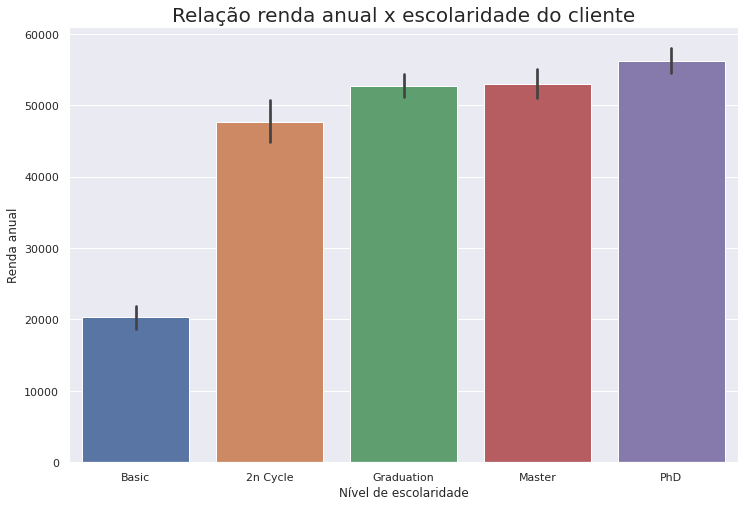

In [161]:
sns_analysis = marketing_campaign_dataframe[['Education', 'Income']].copy()
sns_analysis.columns = ['Nível de escolaridade', 'Renda anual']

plt.figure(figsize=(12, 8))
plt.title('Relação renda anual x escolaridade do cliente', fontsize=20)
sns.barplot(sns_analysis['Nível de escolaridade'], sns_analysis['Renda anual'], 
            order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'])

plt.show()